In [85]:
#importing requested libraries
import tensorflow as tf
from tensorflow import keras
# print(keras.__version__)
from keras import datasets


In [105]:
# Loading cifar datasets
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [107]:
classes=['airplane','autombile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train=y_train.reshape(-1,)
y_train[0]

6

<Figure size 1080x144 with 0 Axes>

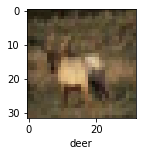

<Figure size 1080x144 with 0 Axes>

In [110]:

import matplotlib.pyplot as plt
def show_img(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])
show_img(x_train,y_train,3)
plt.figure(figsize=(15,2))
# plt.imshow(x_train[0])

In [97]:
x_train=x_train/255.0
x_test=x_test/255.0
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
input_shape=(32,32,3)
model=Sequential()
model.add(Conv2D(128,(8,8),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(8,8),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,batch_size=64)

In [ ]:
score=model.evaluate(x_test,y_test)
print('Loss = ',score[0],' -------- Accuracy = %',score[1]*100)